In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('Customer Churn.csv')

In [ ]:
# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [ ]:
# Replace any space in 'TotalCharges' with 0 and convert to float
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
# Check updated information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for missing values
df.isnull().sum().sum()

0

In [ ]:
# Handle missing values if any (median imputation for numeric columns)
df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
df[df_numeric.columns] = df_numeric.fillna(df_numeric.median())  # Fill missing numeric values with median


In [ ]:
# Statistical summary of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Check for duplicated customer IDs
df["customerID"].duplicated().sum()

0

In [ ]:
# Convert 'SeniorCitizen' column values from 0/1 to 'no'/'yes'
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

## Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [ ]:
# Convert other categorical columns to 'category' type
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df[cat_columns] = df[cat_columns].astype('category')


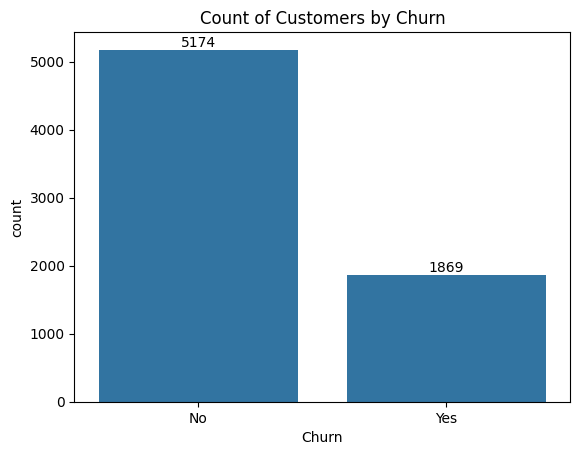

In [ ]:
# Count of customers by Churn
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

<ipython-input-15-340848f46f66>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb = df.groupby("Churn").agg({'Churn': "count"})


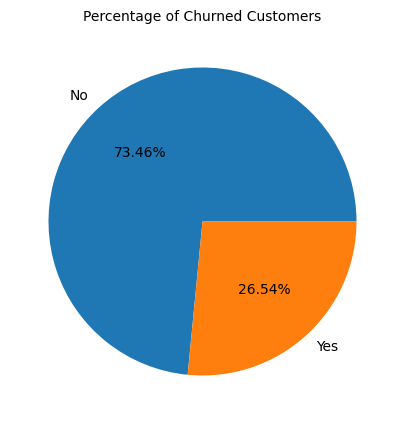

In [ ]:
# Pie chart for percentage of churned customers
plt.figure(figsize=(5,5))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

## From the given pie chart we can conclude that 26.54% of our customers have churned out. Let's explore the reason behind it.

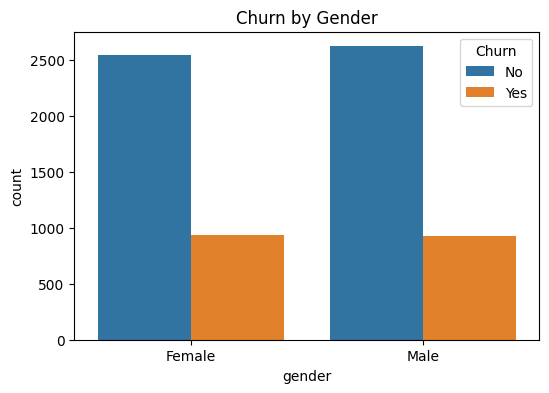

In [ ]:
# Churn by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

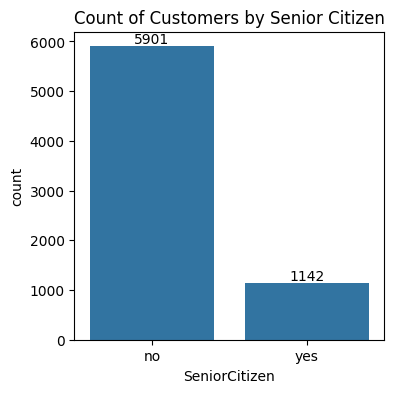

In [ ]:
# Count of Customers by Senior Citizen
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

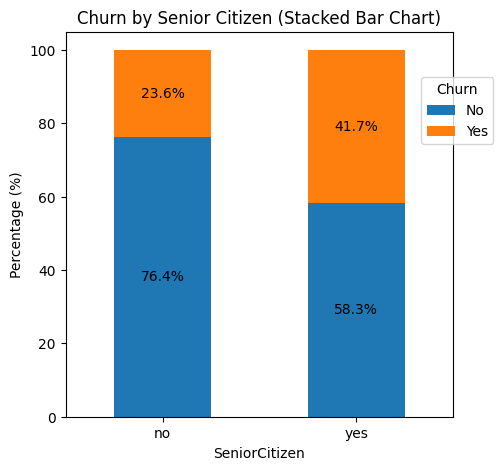

In [ ]:
# Stacked bar chart of Churn by Senior Citizen
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
fig, ax = plt.subplots(figsize=(5,5))
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(0.9,0.9))
plt.show()

## Comparative a greater pecentage of people in senior citizen category have churned

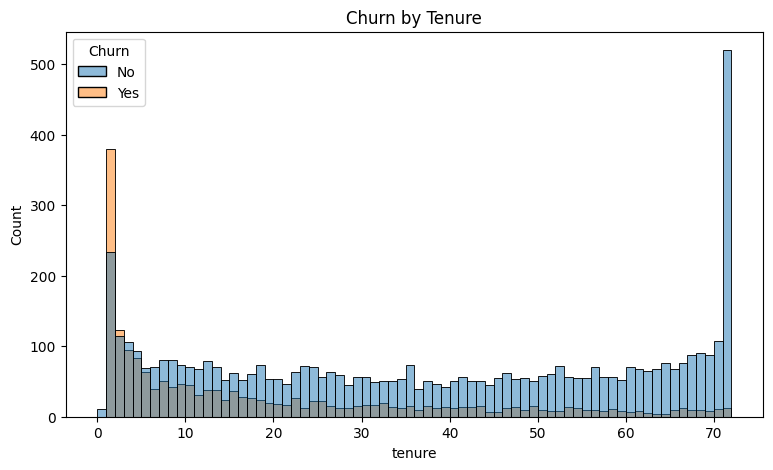

In [ ]:
# Tenure vs Churn (Histogram)
plt.figure(figsize=(9,5))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.title('Churn by Tenure')
plt.show()

## We can infer that, eople who have used our services for a long time have stayed and people who have used our sevices for 1 or 2 months  have churned.

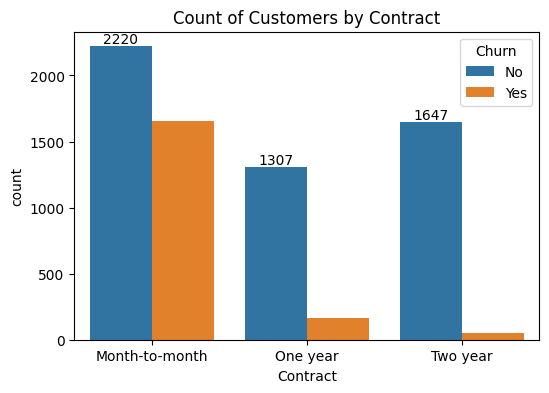

In [ ]:
# Count of customers by Contract type
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

## People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

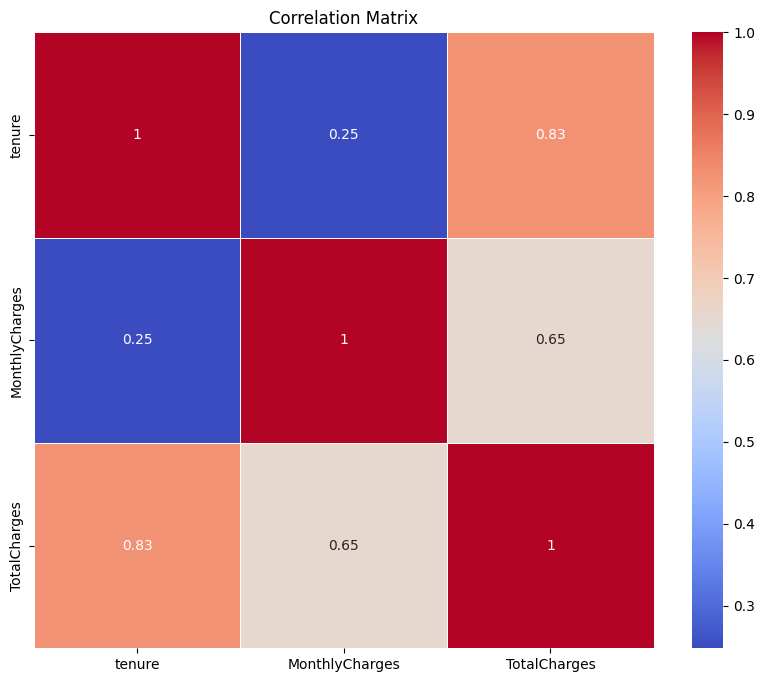

In [ ]:
# Correlation matrix for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

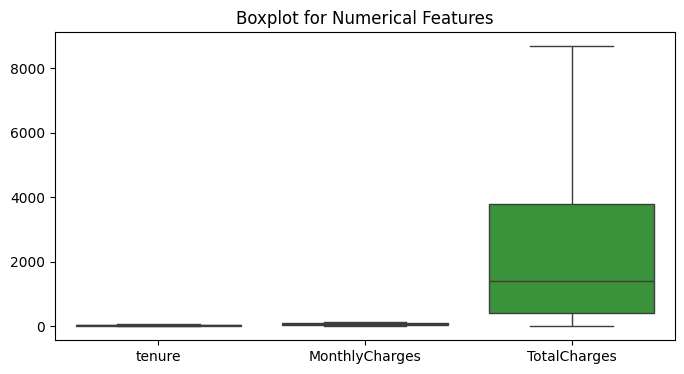

In [ ]:
# Boxplot for detecting outliers in numerical features
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title('Boxplot for Numerical Features')
plt.show()

Based on the boxplot for numerical features (tenure, MonthlyCharges, TotalCharges), here are the key observations:

1. **Tenure**:
   - The tenure feature shows no visible outliers. The boxplot is compressed near the bottom, indicating that tenure values are relatively small compared to the scale of other features.

2. **MonthlyCharges**:
   - Similar to tenure, the distribution of monthly charges is tightly compressed at the bottom of the plot. There are no visible extreme outliers for MonthlyCharges.

3. **TotalCharges**:
   - The boxplot for TotalCharges is more spread out and reveals a larger range. The presence of whiskers and a few data points above and below the box suggests that TotalCharges has more variability and potentially some outliers at the extreme ends.

### Key Insight:
- **TotalCharges** shows higher variability and potential outliers compared to tenure and MonthlyCharges, which have more compressed distributions with no significant outliers.

<Figure size 1200x600 with 0 Axes>

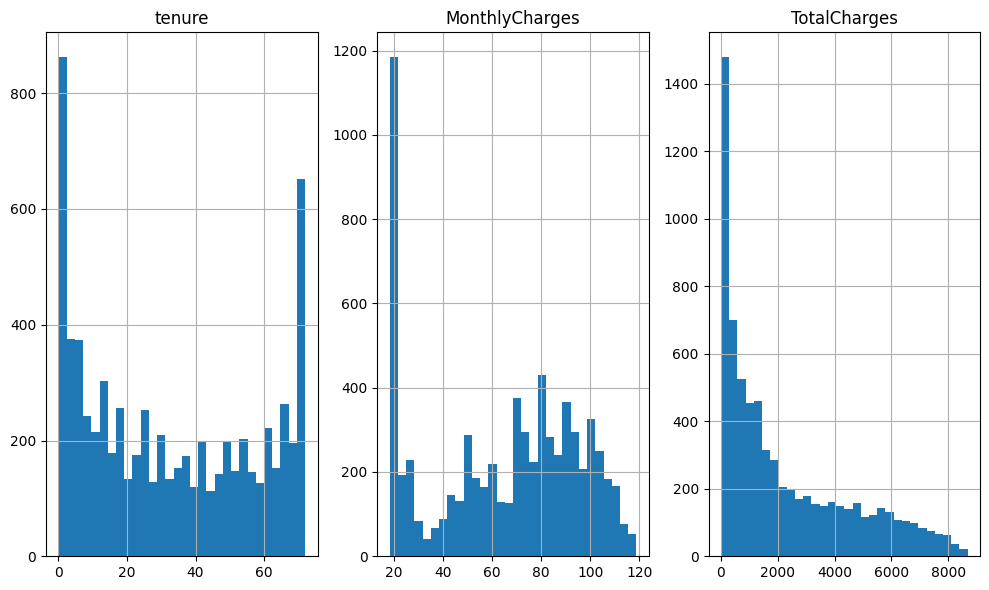

In [ ]:
# Distribution plot for numerical features
plt.figure(figsize=(12,6))
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(10,6), layout=(1, 3))
plt.tight_layout()
plt.show()

### - **Tenure** shows a **bimodal distribution**: customers either have very short or very long tenures.
- There are fewer customers with mid-range tenure values.
- Indicates two distinct groups: those who churn early and those who stay long-term.
- **MonthlyCharges** has a **slight right skew**: most customers pay between **20 to 60 dollars**.
- Fewer customers pay higher charges, up to 120 dollars.
- **TotalCharges** is **heavily right-skewed**, with many customers having low total charges (likely newer customers).
- High total charges are accumulated by customers with longer tenure.
- **Inference**: Customers with **shorter tenure** and **higher monthly charges** could be at higher churn risk. Further analysis needed to validate.

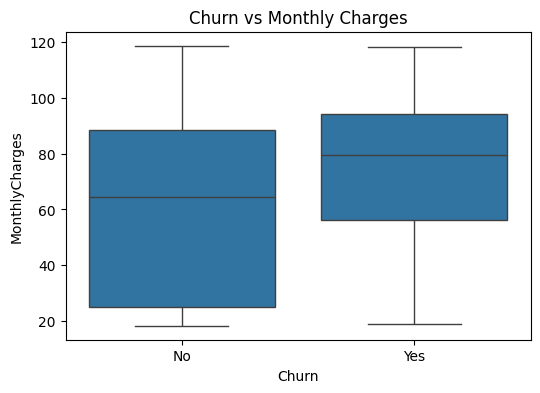

In [ ]:
# Churn vs MonthlyCharges (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs Monthly Charges')
plt.show()

### Here are the key inferences from the **Churn vs Monthly Charges boxplot**:

- **Median Monthly Charges** for customers who **churned** is **higher** (80 dollars) compared to those who did not churn (60 dollars).
- The **interquartile range (IQR)** for customers who churned is narrower, indicating less variability in charges for this group.
- The **whiskers** (min and max values) for both churned and non-churned customers show similar lower and upper limits (around 20 to 120 dollars).
- Customers with **higher monthly charges** seem to be more likely to churn, as reflected in the higher median for churned customers.
- **Inference**: Higher monthly charges could be a potential indicator of churn risk, suggesting that premium customers might need more attention to avoid churn.

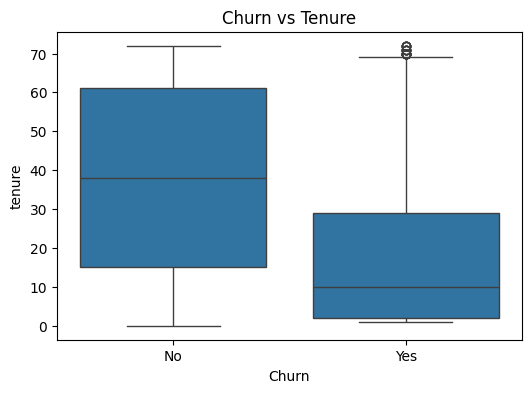

In [ ]:
# Churn vs Tenure (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs Tenure')
plt.show()

### Here are the key inferences from the **Churn vs Tenure boxplot**:

- **Median tenure** for customers who **did not churn** is significantly higher (40 months) than for those who churned (10 months).
- Customers who **churned** tend to have a **shorter tenure**, as their distribution is concentrated towards the lower end.
- There are **outliers** in the churned group, indicating that some customers with longer tenure still churned.
- The **tenure distribution** for non-churned customers shows a wider range, meaning they are more evenly spread across different tenure lengths.
- **Inference**: Customers with shorter tenure are more likely to churn, suggesting that newer customers may need retention efforts early in their journey.

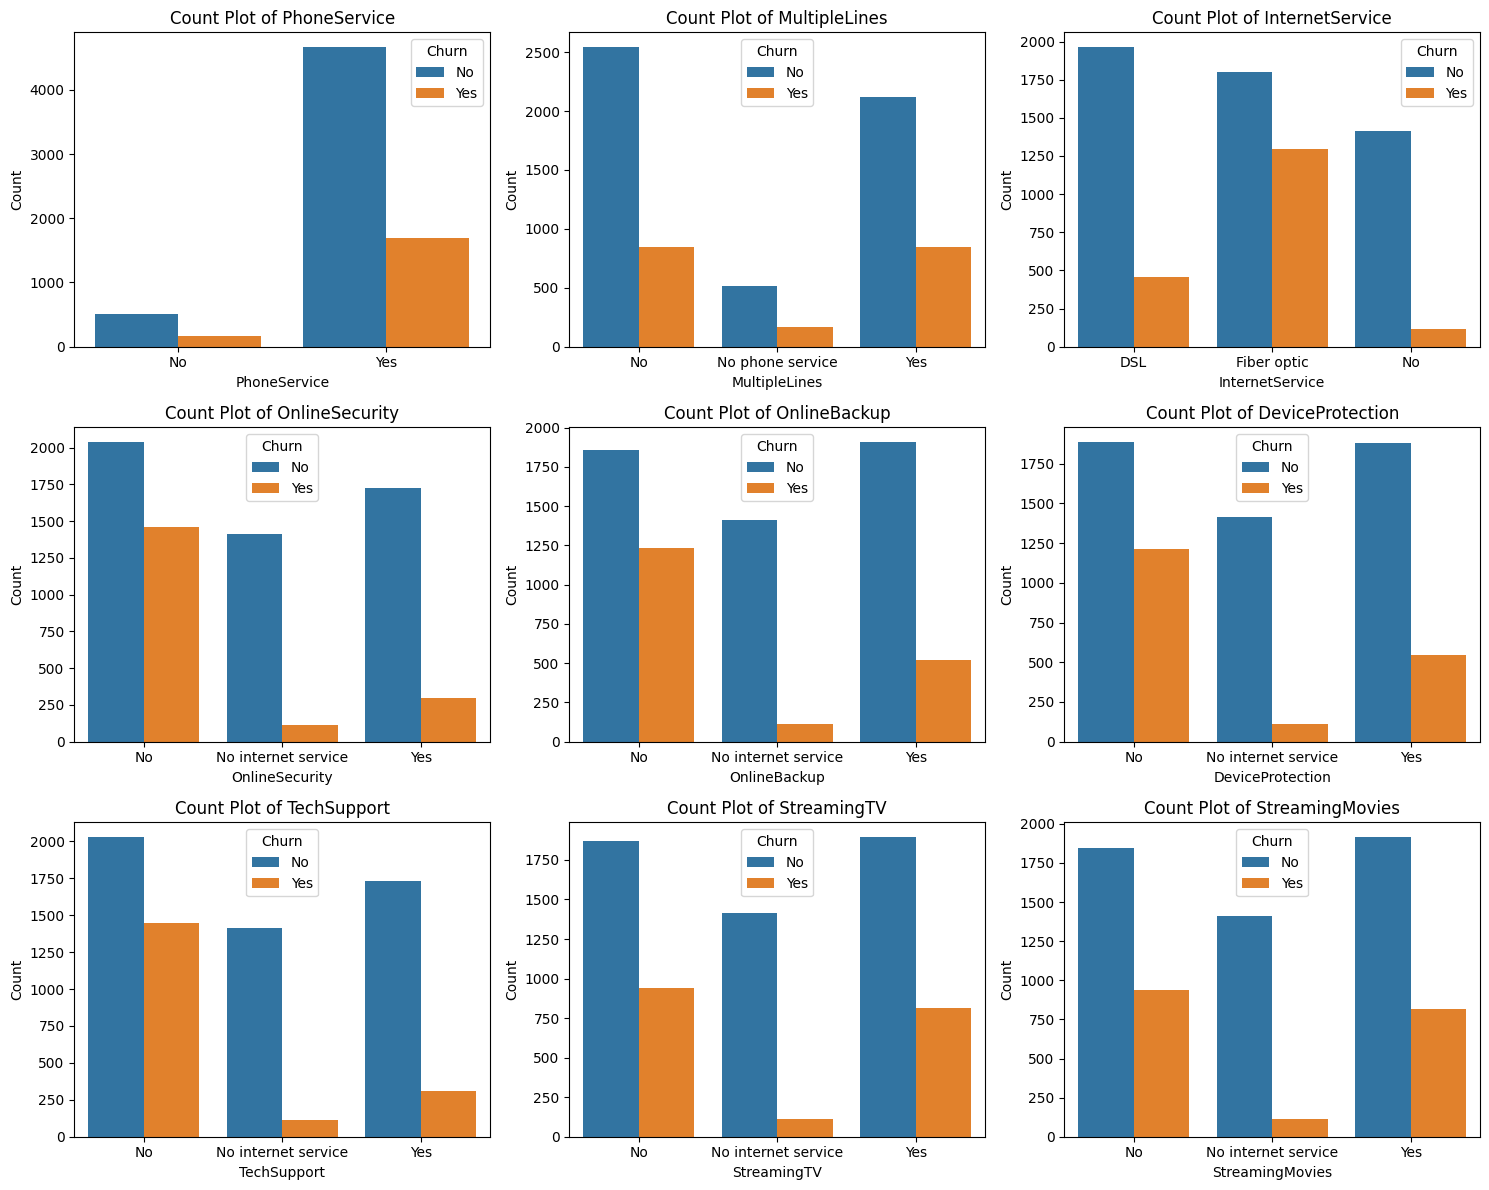

In [ ]:
# Count of customers by phone and internet-related services
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Here's what the plots are showing based on the data distribution:

1. **Phone Service**:
   - Most customers have phone service (right bar is larger), and among them, a noticeable portion has churned. However, customers without phone service (left bar) are fewer, and they churn less often.

2. **Multiple Lines**:
   - Among customers who have a phone service, the number with multiple lines is significant. Churn is higher for customers with multiple lines than for those with only a single line or no phone service (middle bar).

3. **Internet Service**:
   - Customers with "Fiber optic" internet have higher churn compared to those with "DSL" or no internet service. The "Fiber optic" customers who churn make up a sizable chunk of the total.

4. **Online Security**:
   - Most customers do not have online security, and this group shows a relatively high churn rate. Customers with online security seem to churn less frequently.

5. **Online Backup**:
   - The churn rate is higher for customers without online backup services, with the "No" bar showing a clear split between those who churn and those who don't. However, for those who have the service, churn is comparatively lower.

6. **Device Protection**:
   - Churn is higher for customers who do not have device protection. A smaller portion of customers who have device protection still churn, but the overall churn rate is lower in that group.

7. **Tech Support**:
   - Customers who lack tech support have significantly higher churn rates. Customers with tech support are much less likely to churn, as seen by the smaller size of the orange bar (churners) in this group.

8. **Streaming TV**:
   - Customers with access to streaming TV tend to churn more frequently than those without the service. The right bar (customers with streaming TV) shows a larger orange segment (churn).

9. **Streaming Movies**:
   - A similar trend to Streaming TV: Customers who subscribe to streaming movies also have higher churn rates than those without the service.

### Summary of Trends from the Plots:
- **Churn rates tend to be higher among customers who are using multiple services** (e.g., multiple lines, fiber-optic internet, streaming services).
- **Lack of supplementary services like online security, backup, device protection, and tech support correlates with higher churn rates**.
- The data suggests that customers with **fiber-optic internet and streaming services** (TV and movies) are more likely to leave, possibly due to dissatisfaction or competition in those service categories.
- **Basic services** like phone service, internet, and tech support seem to play a role in reducing churn when provided, but the complexity or added costs of multiple services (like streaming) may lead to increased churn.

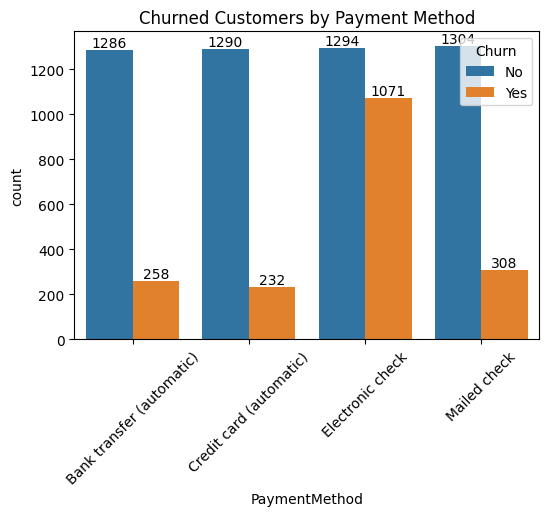

In [ ]:
# Churn by Payment Method
plt.figure(figsize=(6,4))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

### Based on the provided plot for **Churn by Payment Method**, here’s what we can infer:

1. **Bank Transfer (Automatic)**:
   - Customers using automatic bank transfers have low churn (258 churned vs 1286 stayed), indicating high retention with this payment method.

2. **Credit Card (Automatic)**:
   - Similar to bank transfers, automatic credit card payments also show low churn (232 churned vs 1290 stayed), suggesting convenience encourages customers to stay.

3. **Electronic Check**:
   - Electronic check users have the **highest churn rate** by far (1071 churned vs 1294 stayed). This payment method likely correlates with dissatisfaction or service issues.

4. **Mailed Check**:
   - Mailed check users also show a higher churn rate compared to automated methods (308 churned vs 1304 stayed), but it is less dramatic than electronic check.

### Key Insight:
- **Automatic payment methods (bank transfer, credit card) retain customers better**, while **electronic check users churn the most**, possibly indicating a link between manual payment processes and higher churn.